In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [43]:
df = pd.read_csv("Facebook_Marketplace_data.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [44]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [45]:
df.status_published = pd.to_datetime(df.status_published)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'num_reactions')

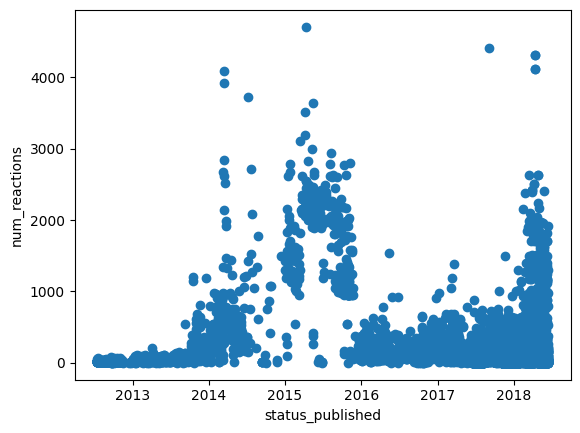

In [57]:
%matplotlib inline
x = df.status_published
y = df.num_reactions
plt.scatter(x,y)
plt.xlabel("status_published")
plt.ylabel("num_reactions")

Text(0, 0.5, 'num_comments')

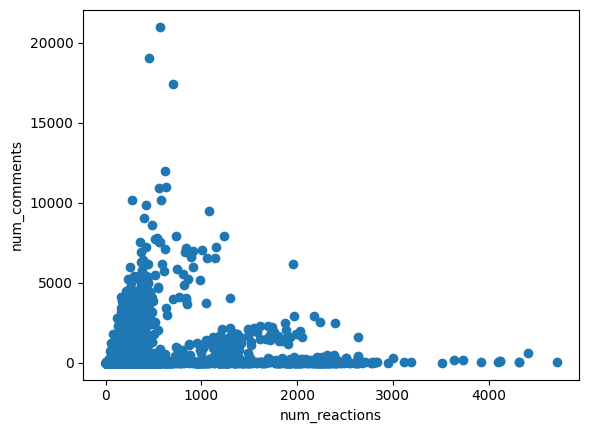

In [56]:
%matplotlib inline
x = df.num_reactions
y = df.num_comments
plt.scatter(x,y)
plt.xlabel("num_reactions")
plt.ylabel("num_comments")

In [58]:
correlation_coefficient = np.corrcoef(df['num_reactions'], df['num_comments'])
correlation_coefficient[0][1]

0.15084290344217643

In [59]:
correlation_coefficient = np.corrcoef(df['num_reactions'], df['num_shares'])
correlation_coefficient[0][1]

0.250722516628319

In [60]:
correlation_coefficient = np.corrcoef(df['num_shares'], df['num_comments'])
correlation_coefficient[0][1]

0.6406374068011983

# ANS2. The correlation between "num_reactions" and "num_comments" is of very low strength which is **0.1508429** in positive direction.
# The correlation between "num_reactions" and "num_shares" is of low strength but more than that of "num_comments" which is **0.25072252** in positive direction.

In [48]:
df = df.drop(["status_id","Column1", "Column2", "Column3", "Column4" ], axis=1)

In [54]:
dummies = pd.get_dummies(df.status_type)
df = pd.concat([df,dummies],axis='columns')
dummies.head()

,link,photo,status,video
0,False,False,False,True
1,False,True,False,False
2,False,False,False,True
3,False,True,False,False
4,False,True,False,False


In [55]:
df.drop(["status_type"],axis='columns',inplace=True)
df.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,...,status,video,link,photo,status,video,link,photo,status,video
0,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,...,False,True,False,False,False,True,False,False,False,True
1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
2,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,...,False,True,False,False,False,True,False,False,False,True
3,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
4,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False


In [13]:
x = df
df["status_published"] = df["status_published"].astype(int)
df.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,1524376800000000000,529,512,262,432,92,3,1,1,0,False,False,False,True
1,1524350700000000000,150,0,0,150,0,0,0,0,0,False,True,False,False
2,1524291420000000000,227,236,57,204,21,1,1,0,0,False,False,False,True
3,1524277740000000000,111,0,0,111,0,0,0,0,0,False,True,False,False
4,1524021720000000000,213,0,0,204,9,0,0,0,0,False,True,False,False


In [14]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

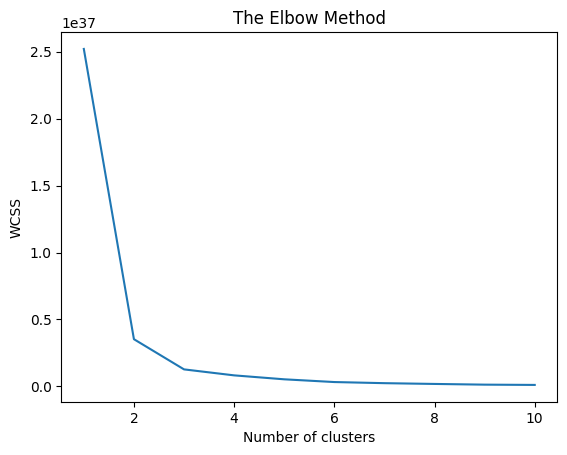

In [15]:
%matplotlib inline
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

## ANS4. The optimal number of clusters for our data would be **k=3**(From the elbow method)

In [16]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# ANS5. The different types of posts in this dataset are - link, photo, status and video i.e.,**4**.

In [17]:
df.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,1524376800000000000,529,512,262,432,92,3,1,1,0,False,False,False,True
1,1524350700000000000,150,0,0,150,0,0,0,0,0,False,True,False,False
2,1524291420000000000,227,236,57,204,21,1,1,0,0,False,False,False,True
3,1524277740000000000,111,0,0,111,0,0,0,0,0,False,True,False,False
4,1524021720000000000,213,0,0,204,9,0,0,0,0,False,True,False,False


In [34]:
df_link = df[df.link == 1]
df_photo = df[df.photo == 1]
df_status = df[df.status == 1]
df_video = df[df.video == 1]
link = []
photo = []
status = []
video = []

In [35]:
def desc(df, arr):
  arr.append(df.num_reactions.mean())
  arr.append(df.num_comments.mean())
  arr.append(df.num_shares.mean())
  return arr



In [36]:
desc(df_link, link)
desc(df_photo, photo)
desc(df_status, status)
desc(df_video, video)

[283.4095972579263, 642.478149100257, 115.67994858611826]

In [40]:
df_link.num_comments.mean()

5.698412698412699

In [38]:
ans6 = pd.DataFrame({"link":link, "photo":photo, "status":status, "video":video}, index=["mean_reactions", "mean_comments", "mean_shares"])

In [39]:
ans6

,link,photo,status,video
mean_reactions,370.142857,181.290345,438.783562,283.409597
mean_comments,5.698413,15.993470,36.238356,642.478149
mean_shares,4.396825,2.553871,2.558904,115.679949
